<a href="https://colab.research.google.com/github/Rohidhs/Fertilizer-Recommendation/blob/main/Fertilizer_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📌 Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier

from google.colab import files
# uploaded = files.upload()

In [ ]:
# 📌 Load Data
df = pd.read_csv("data_core.csv")

In [ ]:
# 📌 Initial Preprocessing
categorical_columns = ["Soil Type", "Crop Type", "Fertilizer Name"]
for col in categorical_columns:
    df[col] = df[col].astype("category")

In [ ]:
# 📌 Encode Categorical Columns
soil_le = LabelEncoder()
df["Soil Type"] = soil_le.fit_transform(df["Soil Type"])

fertilizer_le = LabelEncoder()
df["Fertilizer Name"] = fertilizer_le.fit_transform(df["Fertilizer Name"])

crop_le = LabelEncoder()
df["Crop Type"] = crop_le.fit_transform(df["Crop Type"])

In [ ]:
# 📌 Feature & Target
X = df.drop(columns=["Fertilizer Name", "Crop Type"])
y = df["Fertilizer Name"]

In [ ]:
# 📌 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 📌 Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 📌 Model Training (Keep your model comparison code here)
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

auc_scores = {}
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

🔹 Model: Logistic Regression
               precision    recall  f1-score   support

           0       0.18      0.09      0.12       241
           1       0.12      0.17      0.14       241
           2       0.15      0.19      0.17       215
           3       0.17      0.05      0.08       236
           4       0.14      0.04      0.06       219
           5       0.13      0.21      0.16       239
           6       0.10      0.16      0.12       209

    accuracy                           0.13      1600
   macro avg       0.14      0.13      0.12      1600
weighted avg       0.14      0.13      0.12      1600

🔹 Model: Random Forest
               precision    recall  f1-score   support

           0       0.15      0.15      0.15       241
           1       0.15      0.16      0.15       241
           2       0.12      0.12      0.12       215
           3       0.15      0.13      0.14       236
           4       0.16      0.16      0.16       219
           5       0.15 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/xgboost/c

🔹 Model: AdaBoost
               precision    recall  f1-score   support

           0       0.14      0.02      0.03       241
           1       0.00      0.00      0.00       241
           2       0.13      0.17      0.15       215
           3       0.00      0.00      0.00       236
           4       0.00      0.00      0.00       219
           5       0.16      0.28      0.20       239
           6       0.13      0.53      0.21       209

    accuracy                           0.14      1600
   macro avg       0.08      0.14      0.08      1600
weighted avg       0.08      0.14      0.08      1600

🔹 Model: XGBoost
               precision    recall  f1-score   support

           0       0.14      0.14      0.14       241
           1       0.14      0.13      0.14       241
           2       0.11      0.11      0.11       215
           3       0.12      0.10      0.11       236
           4       0.17      0.17      0.17       219
           5       0.19      0.20      0.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


🔹 Model: LightGBM
               precision    recall  f1-score   support

           0       0.14      0.12      0.13       241
           1       0.12      0.12      0.12       241
           2       0.14      0.13      0.13       215
           3       0.16      0.14      0.15       236
           4       0.15      0.16      0.15       219
           5       0.16      0.17      0.17       239
           6       0.17      0.21      0.19       209

    accuracy                           0.15      1600
   macro avg       0.15      0.15      0.15      1600
weighted avg       0.15      0.15      0.15      1600

🔹 Model: CatBoost
               precision    recall  f1-score   support

           0       0.12      0.11      0.11       241
           1       0.15      0.12      0.14       241
           2       0.11      0.11      0.11       215
           3       0.12      0.11      0.12       236
           4       0.16      0.18      0.17       219
           5       0.16      0.17      0

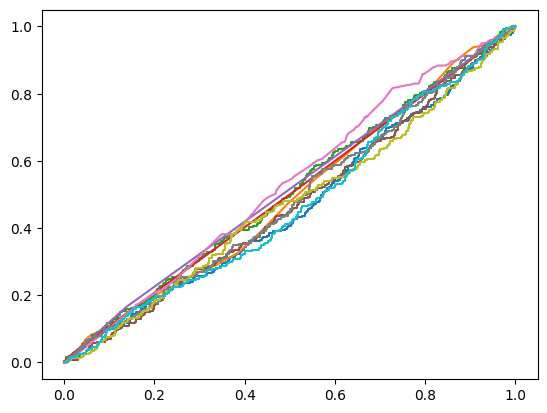

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    print(f"🔹 Model: {name}\n", classification_report(y_test, y_pred))
    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    auc_scores[name] = auc
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

<ipython-input-35-31ba2fc80542>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


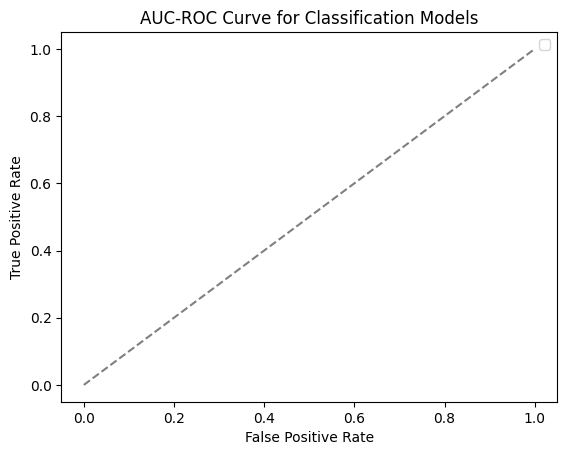

In [ ]:
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve for Classification Models")
plt.legend()
plt.show()

In [ ]:
auc_scores = dict(sorted(auc_scores.items(), key=lambda x: x[1], reverse=True))
print("\n🔹 Model Performance (Sorted by AUC Score):")
for model, score in auc_scores.items():
    print(f"{model}: AUC = {score:.3f}")


🔹 Model Performance (Sorted by AUC Score):
Support Vector Machine: AUC = 0.509
Decision Tree: AUC = 0.506
XGBoost: AUC = 0.506
CatBoost: AUC = 0.502
Random Forest: AUC = 0.501
K-Nearest Neighbors: AUC = 0.501
AdaBoost: AUC = 0.500
LightGBM: AUC = 0.495
Gradient Boosting: AUC = 0.486
Logistic Regression: AUC = 0.483


<ipython-input-37-d8153de7d0b7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues_r')


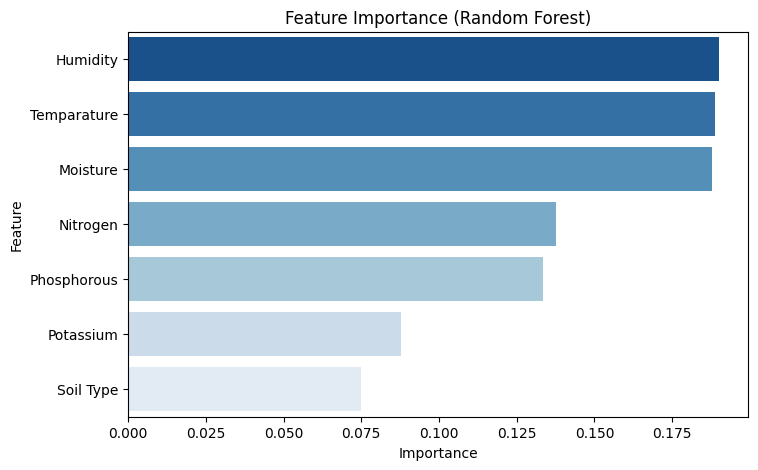

In [ ]:
# 📌 Feature Importance (Random Forest)
feature_importance = RandomForestClassifier().fit(X_train, y_train).feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues_r')
plt.title("Feature Importance (Random Forest)")
plt.show()

In [ ]:
# 📌 Fertilizer Recommendation Function
final_model = RandomForestClassifier()
final_model.fit(X_train, y_train)

def recommend_fertilizer(temp, humidity, moisture, nitrogen, phosphorous, potassium, soil_type):
    if soil_type not in soil_le.classes_:
        return f"Error: '{soil_type}' not recognized. Choose from: {list(soil_le.classes_)}"

    soil_encoded = soil_le.transform([soil_type])[0]
    input_vector = [[temp, humidity, moisture, nitrogen, phosphorous, potassium, soil_encoded]]
    input_vector_scaled = scaler.transform(input_vector)

    pred_encoded = final_model.predict(input_vector_scaled)[0]
    fertilizer = fertilizer_le.inverse_transform([pred_encoded])[0]
    return f"Recommended Fertilizer: {fertilizer} for Soil Type: {soil_type}"

In [ ]:
# ✅ Test
print(recommend_fertilizer(25, 60, 45, 90, 40, 30, "Black"))

Recommended Fertilizer: 28-28 for Soil Type: Black


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
